1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normal distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [183]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import linalg as la # Stays for Linear Algebra and is a scipy library
from matplotlib import pyplot as plt

def generate_2x2_matrix(matrix, row_indices, col_indices):
    new_matrix = [[matrix[row_indices[0]][col_indices[0]], matrix[row_indices[0]][col_indices[1]]],
                  [matrix[row_indices[1]][col_indices[0]], matrix[row_indices[1]][col_indices[1]]]]
    return new_matrix


Eigenvalues with Covariance Matrix:
  [ 2.62358749e+01 -3.13277007e-15  1.94519998e+00]
Eigenvectors with Covariance Matrix:
  [[-0.11440556 -0.57867961 -0.80749073]
 [-0.81649658 -0.40824829  0.40824829]
 [ 0.56590167 -0.70601929  0.42578405]]
Eigenvalues with SVD:
  [2.62439771e+01 1.94804024e+00 1.12282568e-30]
Eigenvectors with SVD:
  [[-0.11451731 -0.57854018 -0.80757479]
 [ 0.56587907 -0.70613355  0.42562459]
 [-0.81649658 -0.40824829  0.40824829]]
Percentage of variance in contributions:
  93.09749545159937 %
  6.90250454840065 %
  -1.1116574084807027e-14 %


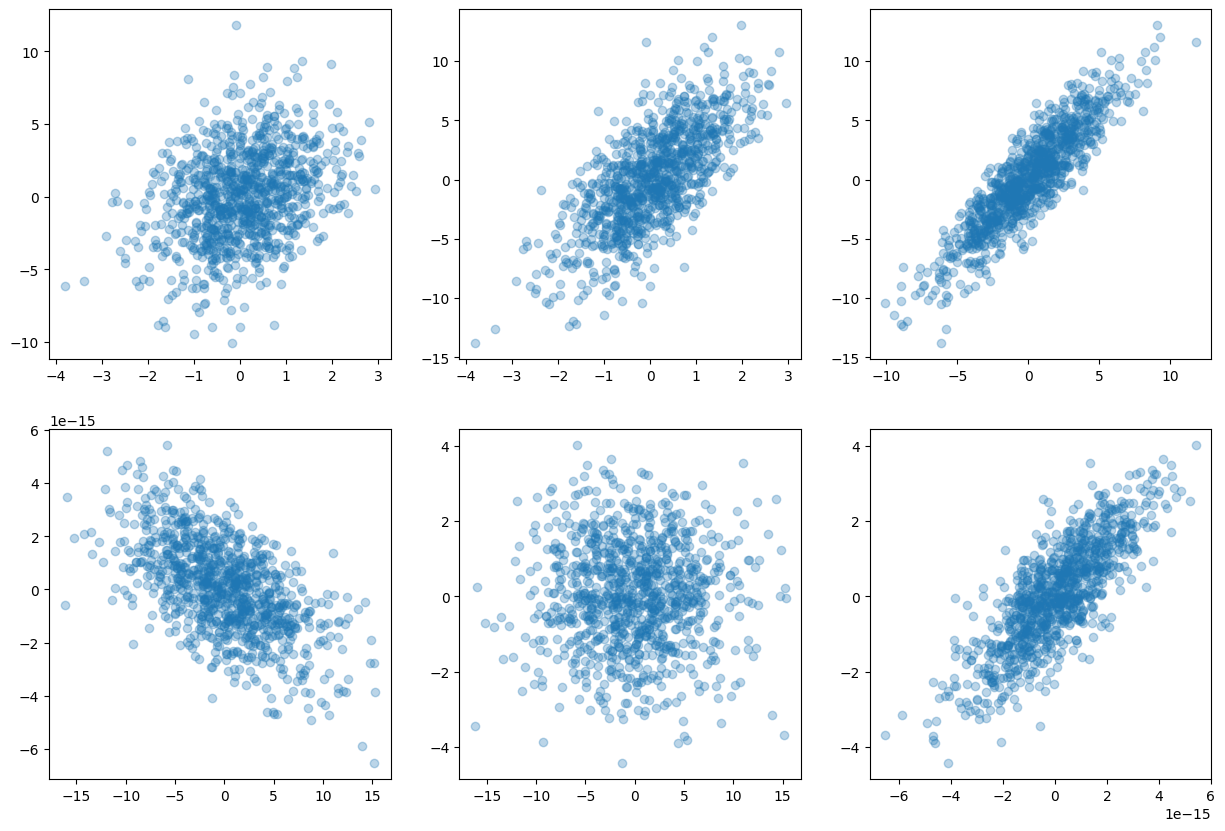

In [180]:
# Generate a dataset with 3 features
samples = 1000
features = [[], [], []]
features[0] = np.random.normal(0, 1, samples)
features[1] = features[0] + np.random.normal(0, 3, samples)
features[2] = 2*features[0] + features[1]

# Find the eigenvectors and eigenvalues of the covariance matrix
l, V = np.linalg.eig(np.cov(features))
l = np.real_if_close(l)
print('Eigenvalues with Covariance Matrix:\n ', l) # eigenvalues of the covariance matrix
print('Eigenvectors with Covariance Matrix:\n ', V.T) # eigenvectors of the covariance matrix

# Find the eigenvectors and eigenvalues using SVD
V_svd, s, Vt = la.svd(features, full_matrices=True)
l_svd = s*s/(samples-1)
print('Eigenvalues with SVD:\n ', l_svd)
print('Eigenvectors with SVD:\n ', V_svd.T)
# From the data, it is celar that the two procedures lead to the same result (apart for permutations)

# Percent of the total dataset's variability explained by the principal components
print("Percentage of variance in contributions:")
for lv in l[np.argsort(-l)]:
    print(' ', 100*(lv.real)/np.sum(l.real), '%')
# Then one can take the two dimensions 0 and 1 preserving the total variance
# This makes sense, becouse we built the third variable from the previous two

# Printing the initial values showing the (0,1), (0,2) and (1,2) proejctions before and after the rotation (in both old and new coordinates)
fig, ((ax0, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(nrows=2, ncols= 3, figsize=(15, 10))
ax0.scatter(features[0], features[1], alpha=0.3)
ax1.scatter(features[0], features[2], alpha=0.3)
ax2.scatter(features[1], features[2], alpha=0.3)

features_rotated = np.dot(V.T, features)
ax3.scatter(features_rotated[0], features_rotated[1], alpha=0.3)
ax4.scatter(features_rotated[0], features_rotated[2], alpha=0.3)
ax5.scatter(features_rotated[1], features_rotated[2], alpha=0.3)


In [181]:
# Reduce the dimensionality of the system so that at least 99% of the total variability is retained
# scale_factor=1
# ind_pos = [0, 1]
# for li, vi in zip(l[ind_pos], generate_2x2_matrix(V.T, ind_pos, ind_pos)):
#     ax0.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)

# ind_pos = [0, 2]
# for li, vi in zip(l[ind_pos], generate_2x2_matrix(V.T, ind_pos, ind_pos)):
#     ax1.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)

# ind_pos = [1, 2]
# for li, vi in zip(l[ind_pos], generate_2x2_matrix(V.T, ind_pos, ind_pos)):
#     ax2.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)

# In the basis of the eigrnvectors
# ind_pos = [0, 1]
# for li, vi in zip(l[ind_pos], np.diag([1]*2)):
#     ax3.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)

# ind_pos = [0, 2]
# for li, vi in zip(l[ind_pos], np.diag([1]*2)):
#     ax4.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)

# ind_pos = [1, 2]
# for li, vi in zip(l[ind_pos], np.diag([1]*2)):
#     ax5.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)


2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [202]:
nof_var = 10

x1 = np.random.normal(loc=0, scale=1, size=samples)  # (args) respectively: mean, std, size of vector
x2 = x1 + np.random.normal(loc=0, scale=3, size=samples)
x3 = 2*x1 + x2
data = pd.DataFrame( { 'x1' : x1, 'x2' : x2, 'x3' : x3  } )

# generate the additional data
for i in range(4,nof_var+4):
    this_mean = np.random.uniform(-1,1)
    # print(f'variable x{i} of mean', this_mean)
    xb = np.random.normal(loc=this_mean, scale=1/50, size=samples)
    data[f'x{i}'] = xb

# Find the eigenvectors and eigenvalues of the covariance matrix
l, V = np.linalg.eig(np.cov(data.T))
l = np.real_if_close(l)
print("Eigenvalues are: ", l)

# Percent of the total dataset's variability explained by the principal components
print("Percentage of variance in contributions:")
for lv in l[np.argsort(-l)]:
    print(' ', 100*(lv.real)/np.sum(l.real), '%')

# Similarly as before, the first three variables have the most percentage of the variance

Eigenvalues are:  [2.70168869e+01 1.98686729e+00 1.49244237e-15 4.33550322e-04
 4.27571023e-04 3.74104872e-04 3.77251741e-04 4.20044810e-04
 4.13604059e-04 3.83199369e-04 3.87918869e-04 4.03965992e-04
 3.96084332e-04]
Percentage of variance in contributions:
  93.1367199859903 %
  6.849430982578946 %
  0.0014946005831929716 %
  0.0014739878365526643 %
  0.0014480423301789953 %
  0.0014258387939371172 %
  0.0013926129850465657 %
  0.0013654421270716513 %
  0.0013372929022296407 %
  0.0013210231244159482 %
  0.0013005195555544843 %
  0.0012896711925824717 %
  5.144974224822205e-15 %


3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


In [205]:
n= 5 # number of cameras
samples = 4000 # number of samples of the motion
center, lenght, freq = 3, 10, 16 # characteristics of the spring

# Creation of the path of the spring, given by the movement on the x axis and on the noise on the y and z axis
time = np.linspace(-lenght+center, lenght+center, samples)
x = lenght*(np.cos(freq*time))+center
y = np.random.normal(loc=0, scale=0.1, size= samples)
z = np.random.normal(loc=0, scale=0.1, size= samples)
df = pd.DataFrame( {"x": x, "y": y, "z": z} )

for i in range(1,n+1):
    # go in the frame of the n-th camera
    theta = np.random.uniform(0, np.pi)
    phi = np.random.uniform(0, 2*np.pi)

    # project the data on that frame
    distance = x*np.cos(phi)*np.sin(theta) + y*np.sin(phi)*np.sin(theta) + z*np.cos(theta)
    df[f'camera{i}_x'] = x - distance*np.cos(phi)*np.sin(theta)
    df[f'camera{i}_y'] = y - distance*np.sin(phi)*np.sin(theta)
    df[f'camera{i}_z'] = z - distance*np.cos(theta)

for i in range(1, n+1):
    l, V = np.linalg.eig(np.cov(df[[f'camera{i}_x', f'camera{i}_y', f'camera{i}_z']].T))
    l = np.real_if_close(l)
    print("Eigenvalues are: ", l)

    print("Percentage of variance in contributions:")
    for lv in l[np.argsort(-l)]:
        print(' ', 100*(lv.real)/np.sum(l.real), '%')

# One can see that in every camera there is only one coordinate that is relevant

Eigenvalues are:  [4.37307397e+01 9.27556339e-16 9.92032603e-03]
Percentage of variance in contributions:
  99.97732012727201 %
  0.022679872727983188 %
  2.1205814855553214e-15 %
Eigenvalues are:  [ 6.79418590e+00 -3.23953695e-16  1.00484712e-02]
Percentage of variance in contributions:
  99.85232032513585 %
  0.1476796748641367 %
  -4.761060211813748e-15 %
Eigenvalues are:  [4.77875740e+01 2.54875003e-15 9.91090850e-03]
Percentage of variance in contributions:
  99.97926479074799 %
  0.020735209252021675 %
  5.33239361880404e-15 %
Eigenvalues are:  [ 3.33516463e+01 -5.08554126e-15  9.93797765e-03]
Percentage of variance in contributions:
  99.97021131383502 %
  0.029788686165003932 %
  -1.5243704293486933e-14 %
Eigenvalues are:  [ 3.24160068e+01 -1.58197939e-15  1.00014968e-02]
Percentage of variance in contributions:
  99.96915594211207 %
  0.030844057887923455 %
  -4.878736147257792e-15 %


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [212]:
# get the dataset and its description on the proper data directory
# !wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
# !wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 
import pandas as pd

data = pd.read_csv("~/data/magic04.data")
data = pd.DataFrame(data)
# One has to remove the last column, which is full of letters
data = data.drop('g', axis=1)

# And then performing the PCA
l, V = np.linalg.eig(np.cov(data.T))
l = np.real_if_close(l)
print("Eigenvalues are: ", l)

print("Percentage of variance in contributions:")
for lv in l[np.argsort(-l)]:
    print(' ', 100*(lv.real)/np.sum(l.real), '%')


Eigenvalues are:  [6.57940709e+03 3.85406143e+03 2.01648128e+03 1.32681867e+03
 6.10218593e+02 4.33618554e+02 1.17335954e+02 8.64007193e-02
 1.07368268e-02 3.85330787e-04]
Percentage of variance in contributions:
  44.04465033014887 %
  25.800316958463995 %
  13.498969086564502 %
  8.88214753766995 %
  4.084997966432598 %
  2.9027809545991405 %
  0.7854843168662526 %
  0.0005783939828186742 %
  7.187574463978675e-05 %
  2.5795272353235325e-06 %
